## 作业2：使用进化策略优化Restrigr函数
2112105068 韦青茂

Rastrigr函数的实现：

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def Rastrigr(x):
    # 检查输入是否为 numpy-array 
    if not isinstance(x, np.ndarray): 
        x = np.asarray(x)   
    return np.sum(np.square(x) - 10 * np.cos(2 * np.pi * x) + 10, axis=-1)

def randomF(low, up, shape): # 生成随机浮点数
    return np.random.ranf(shape)*(up-low)+low
plt.rcParams['font.family']=['simhei']
plt.rcParams['axes.unicode_minus'] = False

### 标准连续进化规划的代码实现

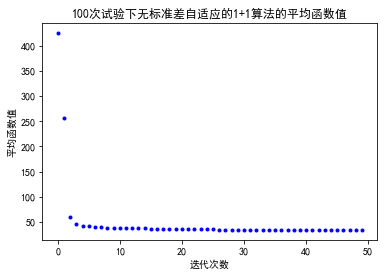

In [3]:
LB, UB = -5.12, 5.12                    # 输入变量的取值范围
N_DIM = 30                              # 输入变量的维度
MAX_ITER = 50                           # 迭代次数
POP_SIZE = 50                           # 种群规模
BETA = 1                                # 标准进化规划的参数beta
minY = [[] for _ in range(MAX_ITER)]
bestX=[]
for _ in range(100):                    # 100次试验
    # 随机生成初始种群
    x = [randomF(LB, UB, [N_DIM]) for _ in range(POP_SIZE)] 
    output = 0         
    for i in range(MAX_ITER):
        y = Rastrigr(x)
        minY[i].append(np.min(y))
        # 归一化
        cost = y/np.sum(y)
        # 生成随机向量r 
        r = [np.random.randn(N_DIM) for _ in range(POP_SIZE)]
        # 变异
        x_new = [(x[_] + r[_])*np.sqrt(BETA*cost[_]) for _ in range(POP_SIZE)]
        x_all = x + x_new 
        y_all = Rastrigr(x_all)
        # 淘汰个体
        x = [x_all[s] for s in np.argsort(y_all)[:POP_SIZE]]
    y = Rastrigr(x)
    bestX.append(x[np.argmin(y)])
        

# 画出曲线
idx = np.arange(MAX_ITER)
avgY = [np.average(i) for i in minY]
figure = plt.plot(idx, avgY, '.', color='blue')
plt.xlabel("迭代次数")
plt.ylabel("平均函数值")
plt.title("100次试验下进化策略算法的平均最小函数值")
plt.show()

## 结果分析
经过多次试验发现，影响该算法收敛的主要部分在于从函数值到费用的归一化。使用最普通的归一化函数，即$$x_i' = \frac{x_i}{\sum{x_i}}$$即可达到目前效果。

[ 0.15320394  0.12179368 -0.07696534 -0.07265902 -0.01613028 -0.06445482
 -0.09512127  0.0227033   0.03309408 -0.04030178  0.04191919 -0.04626509
  0.18333473 -0.12112443 -0.15578669 -0.01299019 -0.03541901 -0.08768872
 -0.06398004  0.03618372  0.05553828 -0.03274748  0.05232244  0.08321316
 -0.06145922 -0.01021141  0.03874408  0.08386612 -0.05165937 -0.12589159]


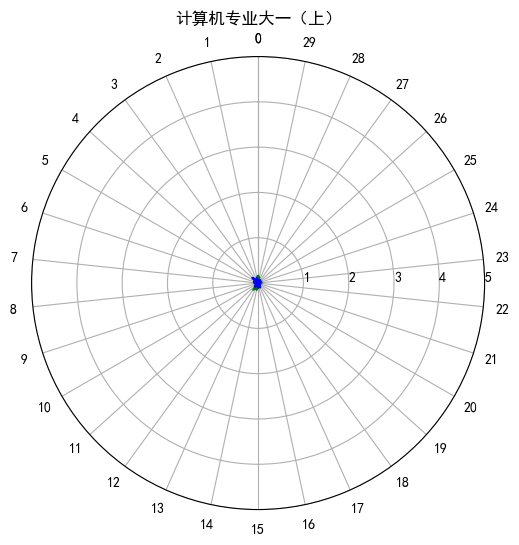

In [4]:
results = [{"大学英语": 87, "高等数学": 79, "体育": 95, "计算机基础": 92, "程序设计": 85},
           {"大学英语": 80, "高等数学": 90, "体育": 91, "计算机基础": 85, "程序设计": 88}]
data_length = len(results[0])
# 将极坐标根据数据长度进行等分
angles = np.linspace(0, 2*np.pi, 30, endpoint=False)
labels = [i for i in range(30)]
score = np.abs(bestX)
# 使雷达图数据封闭
score_a = np.concatenate((score[0], [score[0][0]]))
score_b = np.concatenate((score[1], [score[1][0]]))
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))
# 设置图形的大小
fig = plt.figure(figsize=(8, 6), dpi=100)
# 新建一个子图
ax = plt.subplot(111, polar=True)
# 绘制雷达图
ax.plot(angles, score_a, color='g')
ax.plot(angles, score_b, color='b')
# 设置雷达图中每一项的标签显示
ax.set_thetagrids(angles*180/np.pi, labels)
# 设置雷达图的0度起始位置
ax.set_theta_zero_location('N')
# 设置雷达图的坐标刻度范围
ax.set_rlim(0, 5)
# 设置雷达图的坐标值显示角度，相对于起始角度的偏移量
ax.set_rlabel_position(270)
ax.set_title("计算机专业大一（上）")
print(bestX[0])
plt.show()